## NLP

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [185]:
data = pd.read_csv('data_com.csv', index_col=False, delimiter = ',')
data.head()

,note,commentaire
0,4.0,une bonne suite pour les aventures de sonic au...
1,5.0,Cette suite de sonic est incroyable !Le fan qu...
2,4.5,Très bon film ont retrouve ce qui fait l'espri...
3,4.0,"Super film de ouf, le fait que Knuckles soit d..."
4,3.0,Malgré deux nouveaux personnages de l'univers ...


In [99]:
data.isna().sum()

note           0
commentaire    1
dtype: int64

In [186]:
data.dropna(inplace=True)
data.isna().sum()

note           0
commentaire    0
dtype: int64

In [187]:
data.loc[(data.note>3),'sentiment']=1
data.loc[(data.note<=3),'sentiment']=0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7366 entries, 0 to 7366
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   note         7366 non-null   float64
 1   commentaire  7366 non-null   object 
 2   sentiment    7366 non-null   float64
dtypes: float64(2), object(1)
memory usage: 230.2+ KB


Text(0.5, 1.0, 'répartition par sentiment')

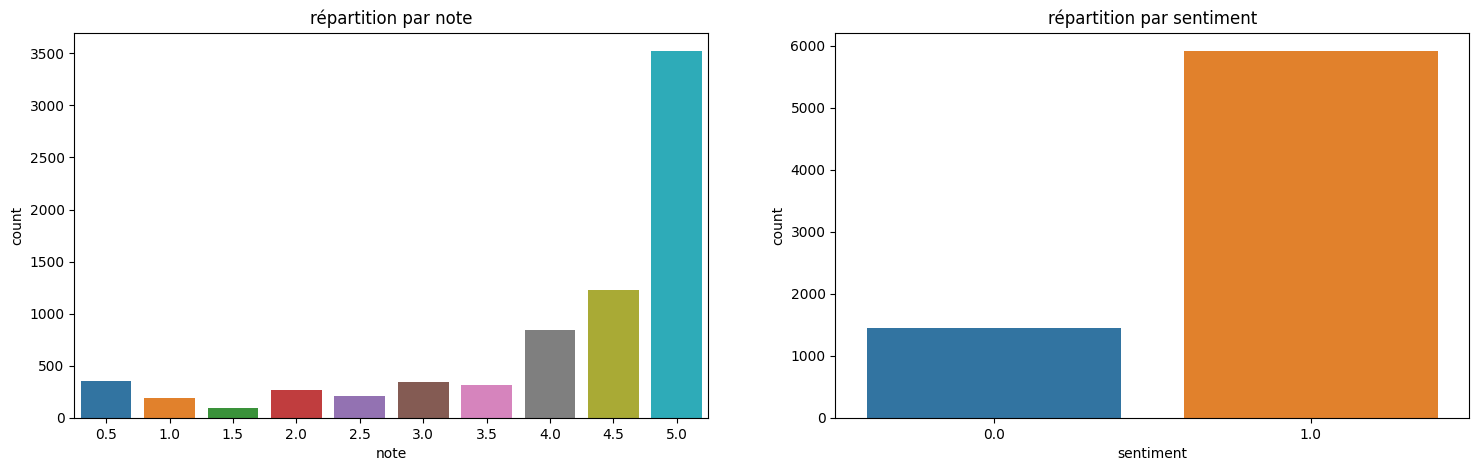

In [102]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x = data.note, data=data, ax=ax[0])
ax[0].set_title("répartition par note")
sns.countplot(x = data.sentiment, data=data, ax=ax[1])
ax[1].set_title("répartition par sentiment")

In [176]:
pd.crosstab(data.note, data.sentiment, margins=True).style.background_gradient(cmap='summer_r')

sentiment,0.000000,1.000000,All
note,,,
0.500000,351,0,351
1.000000,192,0,192
1.500000,98,0,98
2.000000,268,0,268
2.500000,205,0,205
3.000000,340,0,340
3.500000,0,317,317
4.000000,0,842,842
4.500000,0,1231,1231


In [188]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[0-9(),!?@/\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

In [189]:
data_standard = standardize_text(data, 'commentaire')
data_standard.head()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_20108\2884689932.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"http\S+", "")
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_20108\2884689932.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"@\S+", "")
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_20108\2884689932.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[content_field] = df[content_field].str.replace(r"[0-9(),!?@/\'\`\"\_\n]", " ")


,note,commentaire,sentiment
0,4.0,une bonne suite pour les aventures de sonic au...,1.0
1,5.0,cette suite de sonic est incroyable le fan qu...,1.0
2,4.5,très bon film ont retrouve ce qui fait l espri...,1.0
3,4.0,super film de ouf le fait que knuckles soit d...,1.0
4,3.0,malgré deux nouveaux personnages de l univers ...,0.0


In [190]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
from sklearn.model_selection import train_test_split

In [191]:
y = data.sentiment
X = data.commentaire

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(5892,) (1474,)


In [193]:
mots_neg, mots_pos, liste_stopwords=[],[],[]
for i in X_train[y_train == 0]:
    neg = i.split()
    mots_neg+=neg
for i in X_train[y_train == 1]:
    pos = i.split()
    mots_pos+=pos

liste_stopwords = list(set(mots_neg) & (set(mots_pos)))

In [206]:
len(liste_stopwords)

6961

In [198]:
def lemmatizer_stopwords(data):
    lemmatizer = FrenchLefffLemmatizer()
    corpus = []
    for i in range(0, len(data)):
        message = data.iloc[i]
        message = message.split()
        message =[word for word in message if not word in set(stopwords.words('french')+liste_stopwords)]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
    return corpus

In [199]:
X_train_lem = lemmatizer_stopwords(X_train)
X_test_lem = lemmatizer_stopwords(X_test)

In [200]:
X_test_lem

['',
 'génialisime matrix.une reparler nombreuse servir référence.',
 'incroyable....un actrice.une sience etalage extra-terrienne.un projecteur brillants.courez',
 '',
 'acteurs.mention grand.dans assimiler dédicacer revolver relater déconcertante.courez',
 'solution. chauve sourire moquerie incessante pseudo gloire. satisfaire arriérer poser fondamentales. régner nine',
 '',
 'continue...',
 'génialisime. avouer. machination entrainer rater. pérégrination compagnons.',
 'mûrement exploité… magicien propulser renverser ajouter',
 '',
 'taire mangeur années...leo habitude: brady secouer courir',
 'aboutis. sublime. riser',
 'tordage',
 'étoiles.tout scénario...bref incontournable.ps palmarès indétrônable',
 'deviner',
 'saisir scénaristiquement bouleversante. omniprésente. défiler gunfight. faudras',
 '',
 'prenante.',
 'gigantesque surprendre audace mettre yeux. écouter oreille.',
 '',
 'honnête: arriver projectionniste siéger incorfortables min. cul... a-t influer mais:après vautrer 

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [202]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train_lem)
X_test_vec = vectorizer.transform(X_test_lem)

In [203]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train_vec, y_train)

LGBMClassifier()

              precision    recall  f1-score   support

         0.0       0.54      0.07      0.12       286
         1.0       0.81      0.99      0.89      1188

    accuracy                           0.81      1474
   macro avg       0.68      0.53      0.51      1474
weighted avg       0.76      0.81      0.74      1474

Accuracy of LightGBM Model: 80.80054274084125 %


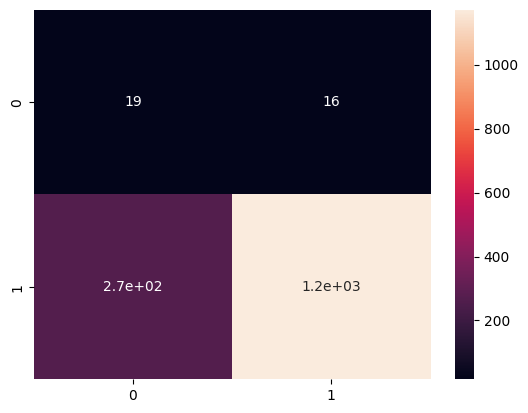

In [204]:
y_pred = classifier.predict(X_test_vec)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

In [144]:
def standardize_phrase(donnees):
        donnees = donnees.replace(r"http\S+", "")
        donnees = donnees.replace(r"http", "")
        donnees = donnees.replace(r"@\S+", "")
        donnees = donnees.replace(r"[0-9(),;!:?@<>.=\'\`\"\-\_\n]", " ")
        donnees = donnees.replace(r"@", "at")
        donnees = donnees.lower()
        
        lemmatizer = FrenchLefffLemmatizer()
        corpus = []
        message = donnees.split()
        message =[word for word in message if word not in stopwords.words('french')]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
        
        return corpus
    


In [181]:
def test_com(com):
    com_standard = standardize_phrase(com)
    com_vector = vectorizer.transform(com_standard)
    print('Bien !' if classifier.predict(com_vector)[0] == 1 else 'pas bien !')   
    print(classifier.predict_proba(com_vector))
    

In [205]:
test_com(f"""Bien trop caricatural.....et le personnage de Magalie joué par Laure Calamy est trop exagéré....et en devient agaçant.....
Et gâche notre plaisir avec ces beaux paysages grecs qui appelle à ma farniente , au repos , à la légèreté.
Et que dire du côté pseudo profond qu'on essaie de nous servir sur la fin du film.
Kristin Scott Thomas dans un rôle de baba cool soixante-huitarde est inattendue...on la reconnaît à peine d'ailleurs....mais toujours aussi belle et magnifique.....et juste dans son rôle.""")

pas bien !
[[0.78053009 0.21946991]]


- 13/01/22 11:30 - Sans data augmentation ou équilibrage des deux classes et TfidfVectorizer + LGBMClassifier(utiliser dans le tuto), le résultat est de 87% !
- 13/01/22 13:40 - Même paramètre qu'au dessus, mais avec suppression des mots en commun entre les com + et -. Le model chutte à 80% ! à avoir si je garde ou non !